In [300]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Generation:

In [585]:
X = -2 + 4*np.random.rand(100,1)
y = np.exp(0.3 + 1.3*X) + np.random.gamma(0.5, 1, size = (X.shape[0],1))
#np.random.gamma(shape = 1, scale = 0.1, size = (X.shape[0],1))

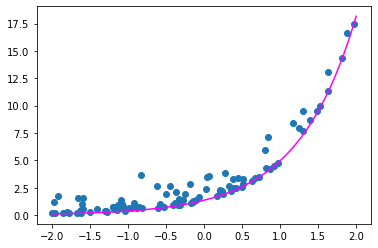

In [586]:
plt.figure()
plt.scatter(X,y)
plt.plot(np.linspace(-2,2,100), np.exp(0.3 + 1.3*np.linspace(-2,2,100)), color = 'magenta')
plt.show()

## Linear Regression:

In [587]:
model_ols = sm.OLS(exog=sm.add_constant(X), endog=y).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           8.18e-25
Time:                        17:41:41   Log-Likelihood:                -214.11
No. Observations:                 100   AIC:                             432.2
Df Residuals:                      98   BIC:                             437.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6489      0.216     16.907      0.0

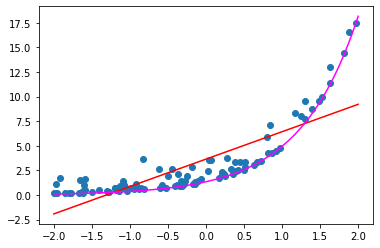

In [588]:
plt.figure()
plt.scatter(X,y)
plt.plot(np.linspace(-2,2,100), model_ols.params[0] + model_ols.params[1]*np.linspace(-2,2,100), color = 'red')
plt.plot(np.linspace(-2,2,100), np.exp(0.3 + 1.3*np.linspace(-2,2,100)), color = 'magenta')
plt.show()

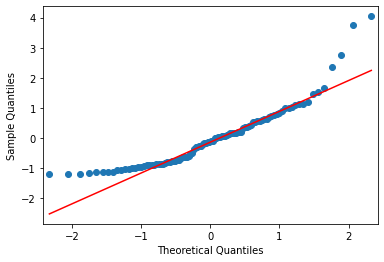

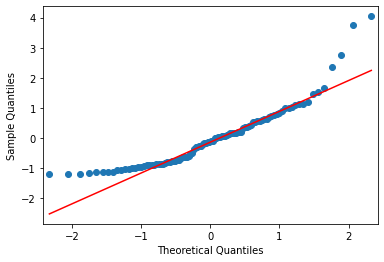

In [589]:
sm.qqplot((model_ols.resid-np.mean(model_ols.resid))/np.std(model_ols.resid), fit = True, line = 'q')

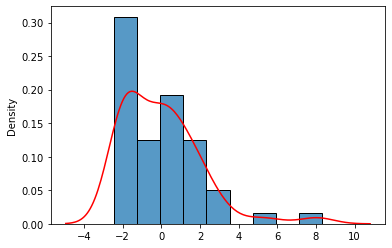

In [590]:
plt.figure()
sns.kdeplot(model_ols.resid, color = 'red')
sns.histplot(model_ols.resid, stat = 'density')
plt.show()

## Linear Regression: Log-level model

In [602]:
model_ols_log = sm.OLS(exog=sm.add_constant(X), endog=np.log(y)).fit()
print(model_ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     445.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           3.13e-38
Time:                        17:42:43   Log-Likelihood:                -67.068
No. Observations:                 100   AIC:                             138.1
Df Residuals:                      98   BIC:                             143.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7192      0.050     14.500      0.0

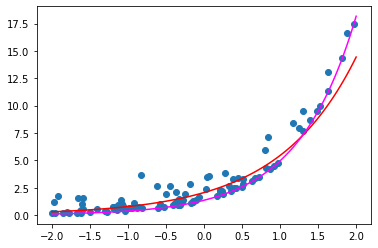

In [592]:
plt.figure()
plt.scatter(X,y)
plt.plot(np.linspace(-2,2,100), np.exp(model_ols_log.params[0] + model_ols_log.params[1]*np.linspace(-2,2,100)), color = 'red')
plt.plot(np.linspace(-2,2,100), np.exp(0.3 + 1.3*np.linspace(-2,2,100)), color = 'magenta')
plt.show()

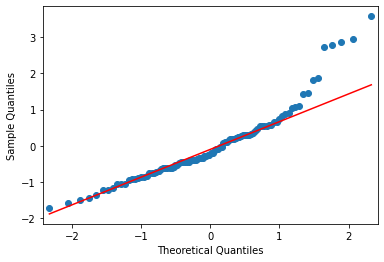

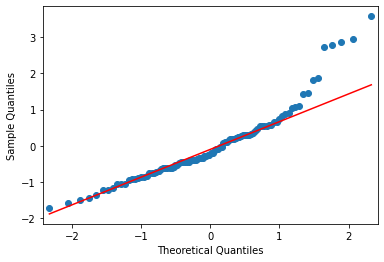

In [593]:
sm.qqplot((model_ols_log.resid-np.mean(model_ols_log.resid))/np.std(model_ols_log.resid), fit = True, line = 'q')

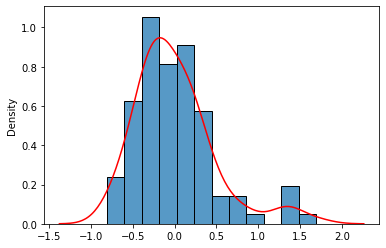

In [594]:
plt.figure()
sns.kdeplot(model_ols_log.resid, color = 'red')
sns.histplot(model_ols_log.resid, stat = 'density')
plt.show()

## GLM:

* link function: log
* distribution: gamma

In [601]:
model_glm = sm.GLM(exog=sm.add_constant(X), endog=y, family=sm.families.Gamma(link = sm.families.links.log())).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                         0.38845
Method:                          IRLS   Log-Likelihood:                -125.77
Date:                Tue, 09 Jan 2024   Deviance:                       26.403
Time:                        17:42:36   Pearson chi2:                     38.1
No. Iterations:                    15   Pseudo R-squ. (CS):             0.9137
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8222      0.065     12.712      0.0

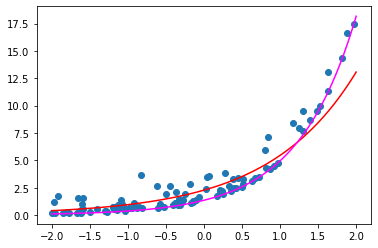

In [596]:
plt.figure()
plt.scatter(X,y)
plt.plot(np.linspace(-2,2,100), model_glm.predict(sm.add_constant(np.linspace(-2,2,100))), color = 'red')
plt.plot(np.linspace(-2,2,100), np.exp(0.3 + 1.3*np.linspace(-2,2,100)), color = 'magenta')
plt.show()

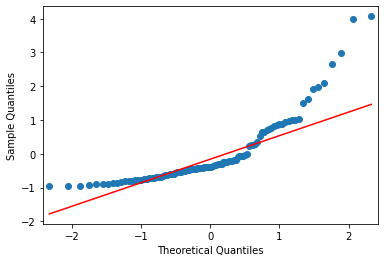

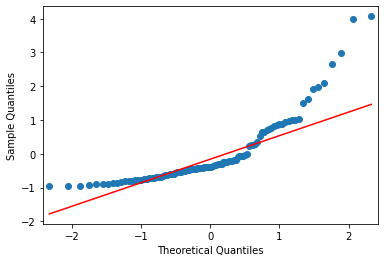

In [597]:
sm.qqplot((model_glm.resid_response-np.mean(model_glm.resid_response))/np.std(model_glm.resid_response), fit = True, line = 'q')

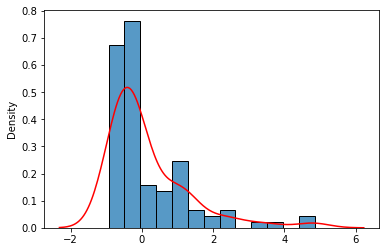

In [598]:
plt.figure()
sns.kdeplot(model_glm.resid_response, color = 'red')
sns.histplot(model_glm.resid_response, stat = 'density')
plt.show()

Sanity Check: A GLM with the identity as link function and a Gaussian distribution results in a OLS estimation:

In [604]:
model_glm = sm.GLM(exog=sm.add_constant(X), endog=y, family=sm.families.Gaussian(link = sm.families.links.identity())).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          4.3254
Method:                          IRLS   Log-Likelihood:                -214.11
Date:                Tue, 09 Jan 2024   Deviance:                       423.89
Time:                        17:43:15   Pearson chi2:                     424.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8533
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6489      0.216     16.907      0.0

In [611]:
X = -2 + 4*np.random.rand(100,1)
y = X >= 0
flip = np.random.binomial(1, 0.1, (X.shape[0],1))
y[flip == 1] = ~y[flip == 1]

#np.random.gamma(shape = 1, scale = 0.1, size = (X.shape[0],1))

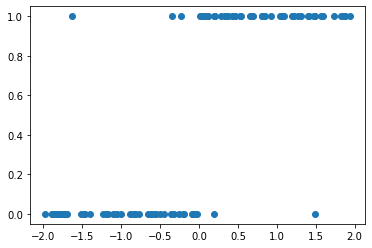

In [615]:
plt.figure()
plt.scatter(X,y)
plt.show()

In [640]:
model_glm = sm.GLM(exog=X, endog=y, family=sm.families.Binomial(link = sm.families.links.logit())).fit()
print(model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27.808
Date:                Tue, 09 Jan 2024   Deviance:                       55.615
Time:                        18:03:19   Pearson chi2:                     342.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5640
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.2324      0.689      4.692      0.0

In [641]:
from statsmodels.discrete import discrete_model
logit_model = discrete_model.Logit(exog=X, endog = y).fit()

Optimization terminated successfully.
         Current function value: 0.278077
         Iterations 8


In [652]:
print("Logit Coeff: %f"%logit_model.params[0])

Logit Coeff: 3.232449


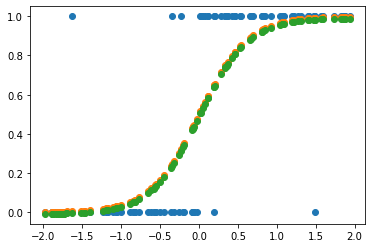

In [644]:
plt.figure()
plt.scatter(X,y)
plt.scatter(X,model_glm.predict())
plt.scatter(X, logit_model.predict()-0.01)
plt.show()